**Import the relevant libraries**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

**Load the data**

In [5]:
raw_data = pd.read_excel(r'C:\Users\user\Downloads\a_Dataset_CreditScoring.xlsx')

In [6]:
raw_data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


**Data preparation**

In [8]:
#show count of rows and columns
raw_data.shape

(3000, 30)

In [9]:
#make a copy of the raw data
data = raw_data.copy()
data

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,126441,0,0,0,2,0.0,2,199,10,...,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2996,0,126448,0,0,0,0,NaN,0,270,3,...,5.0,0.5766,0.9286,0,0,0,0.8571,0,0,0.4167
2997,0,126465,1,1,0,8,0.0,5,234,4,...,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,126487,4,4,0,2,3.0,1,257,3,...,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000


In [10]:
#drop the customer ID column
data = data.drop('ID', axis=1)
data

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,3,3,0,4,0.0,5,117,27,0,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,15,9,0,3,1.0,3,14,14,0,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,0,0,0,1,5.0,1,354,7,0,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,8,5,0,6,1.0,10,16,4,0,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,3,1,0,9,0.0,8,130,52,0,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,2,0.0,2,199,10,0,...,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2996,0,0,0,0,0,NaN,0,270,3,1,...,5.0,0.5766,0.9286,0,0,0,0.8571,0,0,0.4167
2997,0,1,1,0,8,0.0,5,234,4,0,...,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,4,4,0,2,3.0,1,257,3,1,...,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000


In [11]:
#explore missing values
data.isnull().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [12]:
#fill missing values with mean
data = data.fillna(data.mean())

In [13]:
#explore missing values after fix
data.isnull().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [73]:
#count of good loans(0) and bad loans(1)
#the count shows there is class imbalance
data['TARGET'].value_counts()

TARGET
0    2500
1     500
Name: count, dtype: int64

In [15]:
#data summary across 0 & 1
#here i grouped the data by the target and checked the mean of each feature
#this helps to spot trends e.g do bad loan customers have lower income? or do they have more debt?
#this is useful for early feature selection and understanding model behaviour
data.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


In [16]:
data.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,3,3,0,4,0.0,5,117,27,0,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,15,9,0,3,1.0,3,14,14,0,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,0,0,0,1,5.0,1,354,7,0,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,8,5,0,6,1.0,10,16,4,0,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,3,1,0,9,0.0,8,130,52,0,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


**Declare the dependent and independent variable**

In [18]:
y = data['TARGET']
x = data.drop('TARGET', axis=1)

In [19]:
#scale the data
scaler = StandardScaler()

In [20]:
scaler.fit(x)

StandardScaler()

In [21]:
#get the standardized inputs
x_scaled = scaler.transform(x)

**Split data into test and training**

In [77]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=42)

**Handle Class Imbalance**

**Create a SMOTE object**

In [82]:
smote = SMOTE(random_state=42)

In [84]:
# Apply SMOTE to the training features and labels
x_scaled_train_sm, y_train_sm = smote.fit_resample(x_scaled_train, y_train)

**Check the new class balance**

In [91]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0: 2000, 1: 400})
After SMOTE: Counter({0: 2000, 1: 2000})


**Create the regression**

In [95]:
logreg = LogisticRegression(class_weight=None, random_state=42)
logreg.fit(x_scaled_train_sm, y_train_sm)

LogisticRegression(random_state=42)

In [101]:
y_pred = logreg.predict(x_scaled_test)

**Model performance**

In [105]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[376 124]
 [ 35  65]]


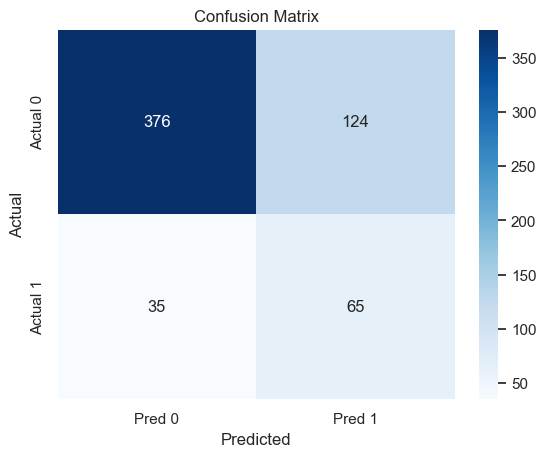

In [107]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [109]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.735


**Classification report**

In [112]:
# Generate the report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=['failure', 'success'])

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round for cleaner display
report_df = report_df.round(3)

# Show the table
report_df

,precision,recall,f1-score,support
failure,0.915,0.752,0.825,500.000
success,0.344,0.650,0.450,100.000
accuracy,0.735,0.735,0.735,0.735
macro avg,0.629,0.701,0.638,600.000
weighted avg,0.820,0.735,0.763,600.000
